# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn import preprocessing


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'
check_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
import numpy as np
import pandas as pd

X1_train = pd.read_pickle(training_file)
X1_test = pd.read_pickle(testing_file)
X1_valid = pd.read_pickle(validation_file)
Sign_check = pd.read_csv(check_file)
X1_train['labels'].shape

(34799,)

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
print(y_train)

[41 41 41 ..., 25 25 25]


In [8]:
X_valid.shape

(4410, 32, 32, 3)

### Include an exploratory visualization of the dataset

In [9]:
X1_test['labels'].shape

(12630,)

In [10]:
X_train = X1_train['features']

In [11]:
X1_shape = X_train.shape
X1_shape

(34799, 32, 32, 3)

In [12]:
X_train.shape

(34799, 32, 32, 3)

In [13]:
#X_train = np.resize(X_train, (34799, 32, 32, 1))

In [14]:
#X_valid = np.resize(X_valid, (4410, 32, 32, 1))

In [15]:
y_train = X1_train['labels']

In [16]:
print(y_train)

[41 41 41 ..., 25 25 25]


In [17]:
print(len(y_train))

34799


In [18]:
label_size = X1_train['sizes']

In [19]:
print(label_size[0])

[26 25]


In [20]:
print(label_size[1])

[27 27]


In [21]:
###How many of label_sizes?

In [22]:
print(len(label_size))

34799


In [23]:
X1_train['sizes'].shape

(34799, 2)

In [24]:
coords = X1_train['coords']

In [25]:
print(coords)

[[  6   5  21  20]
 [  6   6  22  22]
 [  5   6  22  23]
 ..., 
 [ 17  15 178 155]
 [ 17  15 183 160]
 [ 20  18 211 184]]


In [26]:
print(coords[10])

[ 6  6 28 28]


In [27]:
print(coords[1])

[ 6  6 22 22]


In [28]:
print(y_train[0]) #first label is 41

41


In [29]:
Sign_check.SignName[41]

'End of no passing'

In [30]:
X1_valid['features'].shape

(4410, 32, 32, 3)

In [31]:
X1_valid['labels'].shape

(4410,)

### This part is vitulization

In [32]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import random
# Visualizations will be shown in the notebook.
%matplotlib inline




In [33]:
Sign_check

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [34]:
Sign_check[:5]

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [35]:
Sign_check.ClassId[1]

1

9


'No passing'

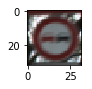

In [36]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
p = y_train[index]
print(p)
Sign_check.SignName[p]

In [37]:
X_train[0]

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ..., 
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ..., 
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ..., 
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ..., 
       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ..., 
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ..., 
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ..., 
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

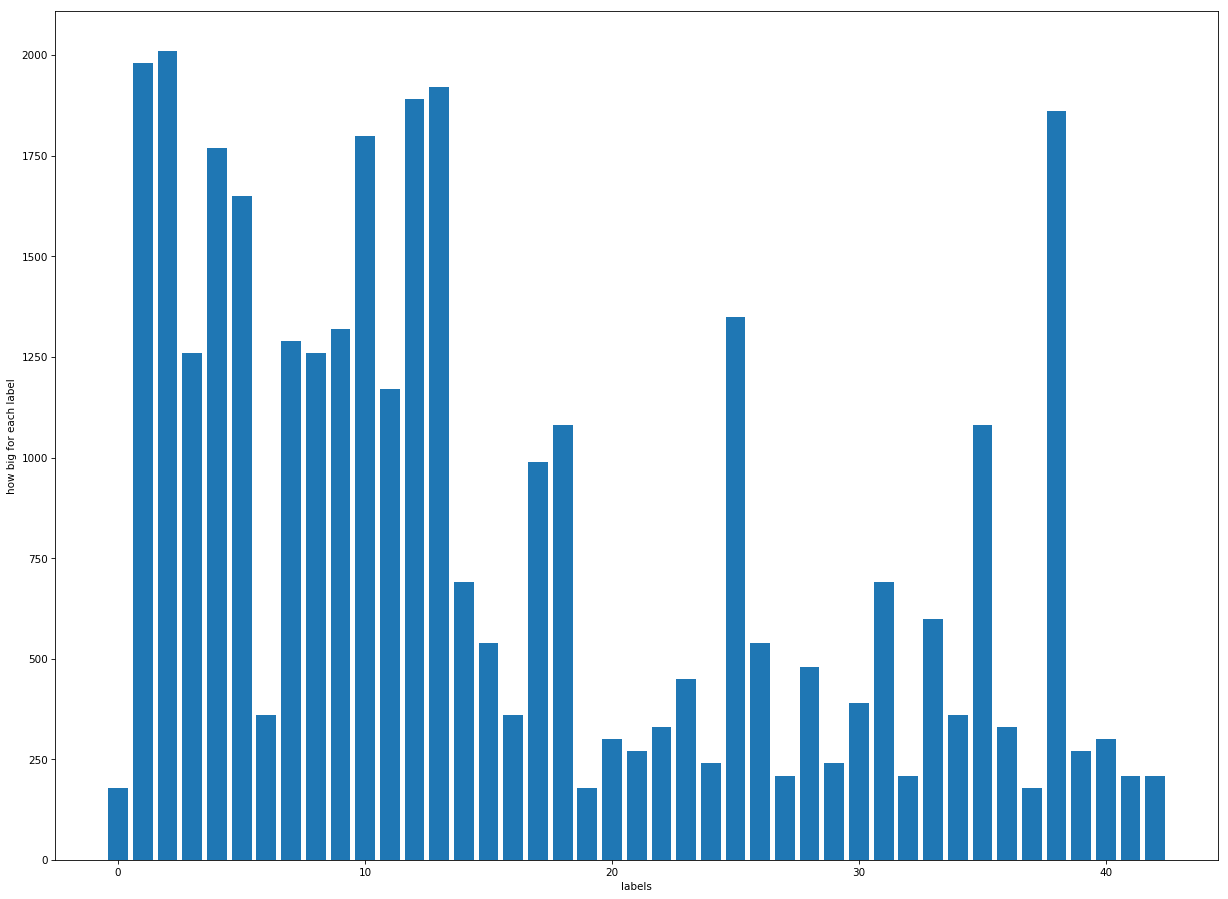

In [38]:
num_labels = np.unique(y_train, return_counts = True)
plt.figure(figsize=(20,15), dpi=75)
plt.bar(num_labels[0], num_labels[1], align='center')
plt.xlabel('labels')
plt.ylabel('how big for each label')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [39]:
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from skimage.exposure import equalize_adapthist



### Normalize / scale

In [40]:
X_train,X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [41]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [42]:
[a, b, c, d] = X_train.shape
[a, b, c, d]

[23315, 32, 32, 3]

In [43]:
data_size = len(X_train)
data_size

23315

In [44]:
#X_train = X_train.reshape(data_size, -1)

In [45]:
X_train.shape

(23315, 32, 32, 3)

In [46]:
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))

In [47]:
#X_train = equalize_adapthist(X_train)

In [91]:
#X_train = preprocessing.normalize(X_train)

In [90]:
#X_train = preprocessing.scale(X_train)

In [50]:
#data_size_1 = len(X_train)

In [92]:
#X_train = X_train.reshape(23315, 32, 32, 3)

In [47]:
X_train.shape

(23315, 32, 32, 3)

In [48]:
filter_height = 5
filter_width = 5

input_depth0 = 3
output_depth0 = 6

input_depth1 = 6
output_depth1 = 12

input_depth2 = 12
output_depth2 = 16

num_labels = 43
flatten = 400 #5x5x16=400
hidden_1 = 120
hidden_2 = 84
keep_prob = .9


### Model Architecture

In [49]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):
    
    mu = 0
    sigma = 0.1
    
    #Layer0: 32x32x3 to 28x28x6
    conv0_W = tf.Variable(tf.truncated_normal(shape=(filter_height, filter_width, input_depth0, output_depth0), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.constant(0.001, shape = [output_depth0]))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b
    
    #Activation
    conv0   = tf.nn.relu(conv0)
    
    #Layer1: 28x28x6 to 24x24x12
    conv1_W = tf.Variable(tf.truncated_normal(shape=(filter_height, filter_width, input_depth1, output_depth1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.constant(0.001, shape = [output_depth1]))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    #Activation
    conv1   = tf.nn.relu(conv1) 
    
    #Pooling From 24x24x12 to 14x14x12
    conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1   = tf.nn.dropout(conv1, keep_prob)
    
    #Layer2: 14x14x12 to 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(filter_height, filter_width, input_depth2, output_depth2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.constant(0.001, shape = [output_depth2]))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation
    conv2   = tf.nn.relu(conv2)
    
    #Pooling From 10x10x16 to 5x5x16
    conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2   = tf.nn.dropout(conv2, keep_prob)
    
    #Flatten 5x5x16=400
    fc0     = flatten(conv2)
    fc0_shape = (fc0.get_shape().as_list()[-1], hidden_1)
    
    #Layer3 400->120
    fc1_W   = tf.Variable(tf.truncated_normal(shape=(fc0_shape), mean = mu, stddev = sigma))
    fc1_b   = tf.Variable(tf.constant(0.001, shape = [hidden_1]))
    fc1     = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation
    fc1     = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    #Layer4: 120->84
    fc2_W   = tf.Variable(tf.truncated_normal(shape=(hidden_1, hidden_2), mean = mu, stddev = sigma))
    fc2_b   = tf.Variable(tf.constant(0.001, shape = [hidden_2]))
    fc2     = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation
    fc2      = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    #Layer5: 84->43
    fc3_W   = tf.Variable(tf.truncated_normal(shape=(hidden_2, num_labels), mean = mu, stddev = sigma))
    fc3_b   = tf.Variable(tf.constant(0.001, shape = [num_labels]))
    logits  = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

In [50]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [51]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

In [52]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

#keep_prob = tf.placeholder('float')
one_hot_y = tf.one_hot(y, num_labels)

In [53]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [54]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss =0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    
    return total_loss / num_examples, total_accuracy / num_examples

In [55]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run([training_operation], feed_dict={x: batch_x, y: batch_y})
        
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    #test_loss, test_accuracy = evaluate(X_test, y_test)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Loss = 111.327
Validation Accuracy = 0.601

EPOCH 2 ...
Validation Loss = 78.522
Validation Accuracy = 0.758

EPOCH 3 ...
Validation Loss = 57.978
Validation Accuracy = 0.812

EPOCH 4 ...
Validation Loss = 51.887
Validation Accuracy = 0.856

EPOCH 5 ...
Validation Loss = 54.533
Validation Accuracy = 0.861

EPOCH 6 ...
Validation Loss = 49.345
Validation Accuracy = 0.876

EPOCH 7 ...
Validation Loss = 45.822
Validation Accuracy = 0.898

EPOCH 8 ...
Validation Loss = 52.290
Validation Accuracy = 0.898

EPOCH 9 ...
Validation Loss = 44.580
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Loss = 44.529
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Loss = 51.079
Validation Accuracy = 0.905

EPOCH 12 ...
Validation Loss = 43.740
Validation Accuracy = 0.908

EPOCH 13 ...
Validation Loss = 54.561
Validation Accuracy = 0.900

EPOCH 14 ...
Validation Loss = 45.632
Validation Accuracy = 0.914

EPOCH 15 ...
Validation Loss = 47.925
Validation Accuracy

In [82]:
X_train.shape

(23315, 32, 32, 3)

### 3. Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.)

  Layer            | Description
  -----------------|---------------
  Input            | 32x32x3 RGB image
  Convolution 3x3  | 1x1 stride, valid padding, outputs 28x28x6
  RELU             | 
  Max pooling      | 2x2 stride, outputs 14x14x6
  Convolution 3x3  | 1x1 stride, valid padding, outputs 10x10x16
  RELU             | 
  Max pooling      | 2x2 stride, valid padding, outputs 5x5x16
  Fully connected  | 120 outputs
  RELU             | 
  Fully connected  | 84 ouputs
  RELU             |
  Fully connected  | 43 labels

### 4. Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

In [ ]:
You can see above. 
optimizer: tf.train.AdamOptimizer/optimizer.minimize
the batch size: 128
epochs: 10
learning rate: 0.001

### 5. Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

In [ ]:
This project really takes me huge amount of time. Before i produce this result, i have 
trained multiple time like couples of 200 times. I chosed my own parameters at the beginning.
It did not turn out well. Accuracy rate is around 0.5 after 200 times training. 

I am out of patient. I decided to stick with original parameters i have learned from 
courses. It works a lot better than my own parameters.

At least i know how tedious it is going to be. LOL

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify

In [48]:
I chosed more than five images. i think i got problems training those 'funny' image. 
those images are never showed up before. i cannot find appropriate label for it. Besdies, 
images size is also an issue.

SyntaxError: invalid syntax (<ipython-input-48-bc720fd76872>, line 1)

### Load and Output the Images

In [50]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imresize
from PIL import Image

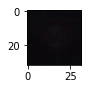

In [51]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[13], cmap='gray')

In [52]:
image_0 = Image.open('image_0.jpg')
image_1 = Image.open('image_1.jpg')
image_2 = Image.open('image_2.png')
image_3 = Image.open('image_3.png')
image_4 = Image.open('image_4.png')
image_5 = Image.open('image_5.png')
image_6 = Image.open('image_6.jpg')
image_7 = Image.open('image_7.png')
image_8 = Image.open('image_8.png')

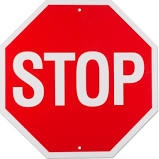

In [53]:
image_0

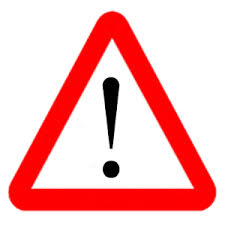

In [54]:
image_1

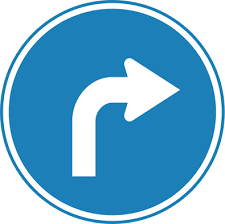

In [55]:
image_2

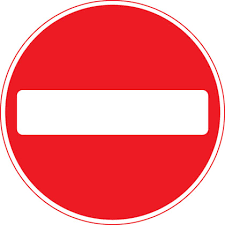

In [56]:
image_3

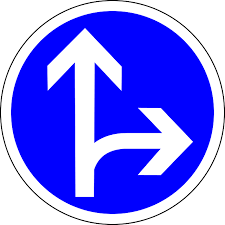

In [57]:
image_4

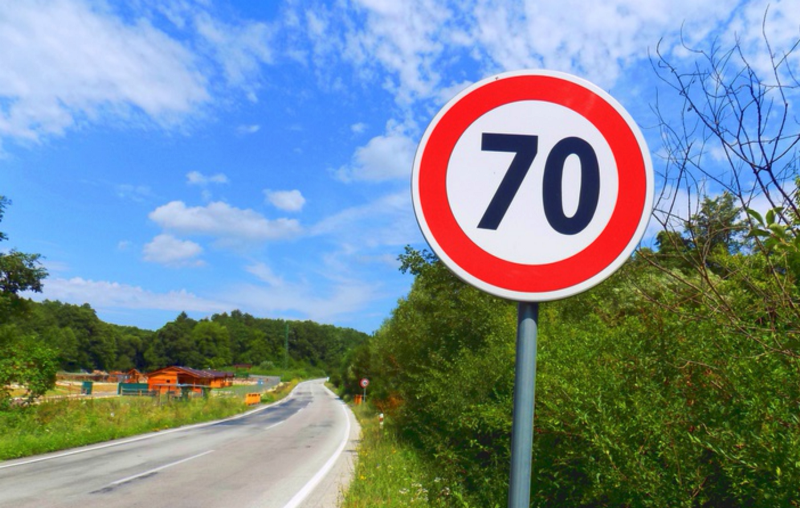

In [58]:
image_5

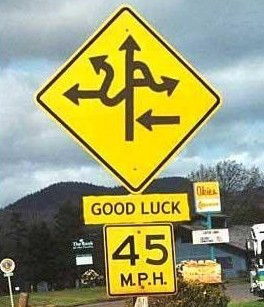

In [59]:
image_6

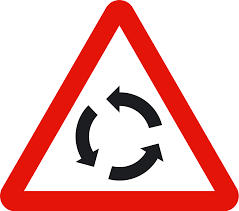

In [60]:
image_7

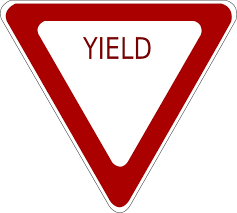

In [61]:
image_8

In [62]:
def image_transform(img):
    rgb = img.convert('RGB')
    resize = imresize(rgb, (32,32))
    return resize

In [63]:
image_0 = image_transform(image_0)
image_1 = image_transform(image_1)
image_2 = image_transform(image_2)
image_3 = image_transform(image_3)
image_4 = image_transform(image_4)
image_5 = image_transform(image_5)
image_6 = image_transform(image_6)
image_7 = image_transform(image_7)
image_8 = image_transform(image_8)

In [64]:
image_0 = image_0.reshape(1,32,32,3)
image_1 = image_1.reshape(1,32,32,3)
image_2 = image_2.reshape(1,32,32,3)
image_3 = image_3.reshape(1,32,32,3)
image_4 = image_4.reshape(1,32,32,3)
image_5 = image_5.reshape(1,32,32,3)
image_6 = image_6.reshape(1,32,32,3)
image_7 = image_7.reshape(1,32,32,3)
image_8 = image_8.reshape(1,32,32,3)

### Predict the Sign Type for Each Image

In [65]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

In [90]:
def evaluate_image(X_data):
    sess = tf.get_default_session()
    batch_X = X_data
    pred = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data})
    top_k = sess.run(tf.nn.top_k(pred, k=5))
    return top_k

In [91]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    tess_loss, test_accuracy_0 = evaluate(image_0, np.array([10]))
    tess_loss, test_accuracy_1 = evaluate(image_1, np.array([11]))
    tess_loss, test_accuracy_2 = evaluate(image_2, np.array([12]))
    tess_loss, test_accuracy_3 = evaluate(image_3, np.array([13]))
    tess_loss, test_accuracy_4 = evaluate(image_4, np.array([14]))
    
    print("Accuracy of 0 = {:.3f}".format(test_accuracy_0))
    print("Accuracy of 1 = {:.3f}".format(test_accuracy_1))
    print("Accuracy of 2 = {:.3f}".format(test_accuracy_2))
    print("Accuracy of 3 = {:.3f}".format(test_accuracy_3))
    print("Accuracy of 4 = {:.3f}".format(test_accuracy_4))
    
    
    prediction_0 = evaluate_image(image_0)
    prediction_1 = evaluate_image(image_1)
    prediction_2 = evaluate_image(image_2)
    prediction_3 = evaluate_image(image_3)
    prediction_4 = evaluate_image(image_4)
    prediction_5 = evaluate_image(image_5)
    prediction_6 = evaluate_image(image_6)
    prediction_7 = evaluate_image(image_7)
    prediction_8 = evaluate_image(image_8)

Accuracy of 0 = 0.000
Accuracy of 1 = 0.000
Accuracy of 2 = 0.000
Accuracy of 3 = 0.000
Accuracy of 4 = 0.000


In [101]:
print(prediction_0)

TopKV2(values=array([[ 0.42689258,  0.26221761,  0.08614831,  0.0847429 ,  0.02779939]], dtype=float32), indices=array([[15, 21,  1, 11,  3]], dtype=int32))


In [102]:
prediction_0

TopKV2(values=array([[ 0.42689258,  0.26221761,  0.08614831,  0.0847429 ,  0.02779939]], dtype=float32), indices=array([[15, 21,  1, 11,  3]], dtype=int32))

In [103]:
prediction_0[0]

array([[ 0.42689258,  0.26221761,  0.08614831,  0.0847429 ,  0.02779939]], dtype=float32)

In [105]:
prediction_0[1]

array([[15, 21,  1, 11,  3]], dtype=int32)

### Analyze Performance

In [71]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

In [108]:
def plot_softmax_visual(prediction):
    
    height = 
    x = np.arange(43)
    plt.figure(figsize=(10,2), dpi=70)
    plt.bar(x,(prediction)[1])
    plt.show()

ValueError: incompatible sizes: argument 'height' must be length 43 or scalar

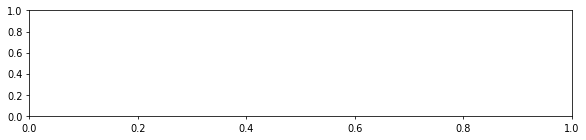

In [109]:
plot_softmax_visual(prediction_0)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [6]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [132]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 